In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import numericalunits as nu

Wishlist
- Person
    - Log of all drinks had (pandas object with time and drink)
    - Convert bac lookup from a table to some functions (2D over weight and alcohol drank) (also 2 different functions for men and women)
    - Change the _decrement_bac function to do this better, maybe from the log rather than having a current_time attribute
 
- Drink
    - Implement a derived MixedDrink class
    - Implement addition of drinks (returns mixed drink)

- Graphs
    - Make some graph function which takes a person object and graphs from their log

- A drink mapper
    - Put in a bac to reach and time you wanna drink over and how long to stay at it



Output Wishlist
- Server hosting this webpage
- Live updating, Selectable characters, selectable drinks/drink history

In [2]:
import bac
reload(bac)

<module 'bac' from 'bac.pyc'>

In [3]:
Person = bac.Person
Drink = bac.Drink

In [235]:
ufo = Drink("UFO", 12, 4.8)
busch_heavy = Drink("BH", 40, 4.3)
jmh = Drink("Jamaican Me Happy", 12, 3.2)
kank_tall = Drink("Kank Tall Maple Porter", 16, 5.6)
shot = Drink("Shot", 1.25, 40.0)
water = Drink("Water", 12, 0.0)
angry = Drink("Angry Orchard", 12, 5.0)
downeast = Drink("Downeast", 12, 5.0)
rum = Drink("Bacardi", 1.5, 40.0)
half_rum = Drink("Bacardi", 0.75, 40.0)
sam_adams = Drink("Fresh as Helles", 12, 5.4)

In [ ]:
rum + ufo

# Keeping track of BAC

In [222]:
alex_coda = Person("Alex Coda", 23, 140)
alex_crist = Person("Alex Crist", 21, 165)
noah = Person("Noah Johnson", 21, 120)
malcolm = Person("Malcolm", 21, 145)

In [242]:
alex_coda.drink(water)
alex_coda.bac

0.094929166666666676

In [241]:
alex_coda.bac

0.11464166666666667

In [239]:
alex_crist.drink(sam_adams)
alex_crist.bac

0.067154166666666681

In [ ]:
noah.drink()
noah.bac

In [231]:
malcolm.drink(rum)
malcolm.bac

0.041054166666666669

## Calculating my BAC over time

In [207]:
times = [datetime(2017, 4, 8, 21, 19),
         datetime(2017, 4, 8, 21, 20),  # 3:30
         datetime(2017, 4, 8, 21, 21),  # 4:30
         datetime(2017, 4, 8, 21, 22),  # 5:30
         datetime(2017, 4, 8, 21, 23),  # 6:30
         datetime(2017, 4, 8, 21, 24),  # 6:30
         datetime(2017, 4, 8, 21, 25)]  # 9:00
drinks = [water, rum, rum, rum, rum, half_rum, water]
bac = []

In [208]:
alex_coda = Person("Alex Coda", 23, 165)
alex_coda.current_time = datetime(2017, 4, 8, 20, 30)

In [209]:
for d, t in zip(drinks, times):
    alex_coda.drink(d, time=t)
    alex_coda.current_time = t
    bac += [alex_coda.get_bac()]

In [210]:
ac_timeline = pd.DataFrame(
    np.array([times, drinks, bac]).T,
    columns = ['Time', 'Drink', 'BAC'])

In [211]:
ac_timeline['Drink'] = [d.name for d in ac_timeline['Drink']]

In [212]:
ac_timeline.set_index('Time', inplace=True)

In [220]:
alex_coda.drink(shot)

In [221]:
alex_coda.bac

0.043895833333333342

In [213]:
ac_timeline

,Drink,BAC
Time,,
2017-04-08 21:19:00,Water,0
2017-04-08 21:20:00,Bacardi,0.022
2017-04-08 21:21:00,Bacardi,0.04375
2017-04-08 21:22:00,Bacardi,0.0655
2017-04-08 21:23:00,Bacardi,0.08725
2017-04-08 21:24:00,Bacardi,0.109
2017-04-08 21:25:00,Water,0.10875


In [214]:
ac_timeline['BAC']['2017-04-08 21:24:00'] = .1206
ac_timeline['BAC']['2017-04-08 21:25:00'] = .1206

In [215]:
ac_timeline

,Drink,BAC
Time,,
2017-04-08 21:19:00,Water,0
2017-04-08 21:20:00,Bacardi,0.022
2017-04-08 21:21:00,Bacardi,0.04375
2017-04-08 21:22:00,Bacardi,0.0655
2017-04-08 21:23:00,Bacardi,0.08725
2017-04-08 21:24:00,Bacardi,0.1206
2017-04-08 21:25:00,Water,0.1206


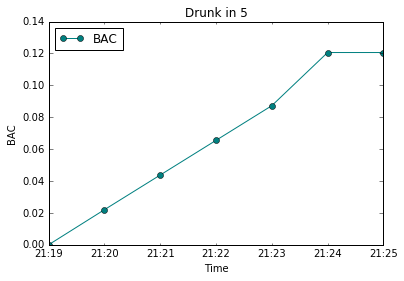

In [218]:
ax = ac_timeline.plot(title='Drunk in 5', style='o-', c='teal')
ax.set_xlabel("Time")
ax.set_ylabel("BAC")
ax.legend(loc='upper left')

In [188]:
drink_list = [ufo, jmh, shot]

In [184]:
alcohol_level += [1]

NameError: name 'alcohol_level' is not defined

In [ ]:
alcohol_level

In [ ]:
alex_coda.bac

In [ ]:
alex_coda.drink(shot)

## Noah Simulation

In [ ]:
times = [datetime(2017, 4, 8, 15, 30),  # 3:30
         datetime(2017, 4, 8, 16, 0),   # 4:00
         datetime(2017, 4, 8, 17, 0),   # 5:00
         datetime(2017, 4, 8, 18, 0),   # 6:00
         datetime(2017, 4, 8, 20, 0)]   # 9:00
drinks = [angry, angry, angry, angry, water]
bac = []

In [ ]:
noah = Person("Noah Johnson", 21, 120)
noah.current_time = datetime(2017, 4, 8, 15, 30)

In [ ]:
for d, t in zip(drinks, times):
    noah.drink(d, new_time=t)
    noah.current_time = t
    bac += [noah.get_bac()]

In [ ]:
n_timeline = pd.DataFrame(
    np.array([times, drinks, bac]).T,
    columns = ['Time', 'Drink', 'BAC'])
n_timeline['Drink'] = [d.name for d in n_timeline['Drink']]
n_timeline.set_index('Time', inplace=True)

In [ ]:
n_timeline.plot()

## Alex Crist 

In [ ]:
times = [datetime(2017, 4, 8, 15, 50),  # 3:50
         datetime(2017, 4, 8, 16, 20),  # 4:20
         datetime(2017, 4, 8, 17, 0),   # 5:00
         datetime(2017, 4, 8, 18, 0),   # 6:30
         datetime(2017, 4, 8, 20, 0),   # 7:00
         datetime(2017, 4, 8, 20, 0)]   # 9:00
drinks = [downeast, ufo, shot, shot, ufo, water]
bac = []

In [ ]:
alex_crist = Person("Alex Crist", 21, 120)
alex_crist.current_time = datetime(2017, 4, 8, 15, 30)

In [ ]:
for d, t in zip(drinks, times):
    alex_crist.drink(d, new_time=t)
    alex_crist.current_time = t
    bac += [alex_crist.get_bac()]

In [ ]:
n_timeline = pd.DataFrame(
    np.array([times, drinks, bac]).T,
    columns = ['Time', 'Drink', 'BAC'])
n_timeline['Drink'] = [d.name for d in n_timeline['Drink']]
n_timeline.set_index('Time', inplace=True)

In [ ]:
n_timeline.plot()